In [1]:
import pandas as pd
import numpy as np

# Load full list of images
Classes with more than 300 images cut down

In [2]:
DATASET_CSV = "feathers_data_cut.csv"
MIN_IMAGES = 50
MAX_IMAGES = 300

In [3]:
images = pd.read_csv(DATASET_CSV)
images.head()

,filename,order,species
0,accipitriformes_accipiter_brevipes_00000.jpg,Accipitriformes,Accipiter Brevipes
1,accipitriformes_accipiter_brevipes_00001.jpg,Accipitriformes,Accipiter Brevipes
2,accipitriformes_accipiter_brevipes_00002.jpg,Accipitriformes,Accipiter Brevipes
3,accipitriformes_accipiter_brevipes_00003.jpg,Accipitriformes,Accipiter Brevipes
4,accipitriformes_accipiter_brevipes_00004.jpg,Accipitriformes,Accipiter Brevipes


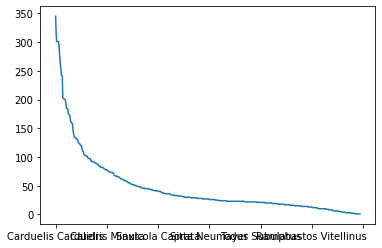

In [4]:
images['species'].value_counts().plot()

# Add taxonomic family
Birds taxonomic is based on The Howard and Moore complete checklist of the birds of the world, 4th. ed.
Downloaded from howardandmoore.org (currently unavailable)

In [5]:
HOWARDMOORE_DATA = "HowardMooreDataset.csv"
taxonomy = pd.read_csv(HOWARDMOORE_DATA)
taxonomy.tail()

,family,genus,species,species english
26152,TURDIDAE,TURDUS,Turdus ruficollis,Red-throated Thrush
26153,TURDIDAE,CATAPONERA,Cataponera turdoides,Sulawesi Thrush
26154,TURDIDAE,CATAPONERA,Cataponera turdoides,Sulawesi Thrush
26155,TURDIDAE,CATAPONERA,Cataponera turdoides,Sulawesi Thrush
26156,TURDIDAE,CATAPONERA,Cataponera turdoides,Sulawesi Thrush


In [6]:
families = taxonomy.drop(['genus', 'species english'], axis=1)
families = families.drop_duplicates(subset=['species']).reset_index(drop=True)

In [7]:
families.tail()

,family,species
10130,TURDIDAE,Turdus naumanni
10131,TURDIDAE,Turdus eunomus
10132,TURDIDAE,Turdus atrogularis
10133,TURDIDAE,Turdus ruficollis
10134,TURDIDAE,Cataponera turdoides


In [8]:
images.species = images.species.str.strip()
families.species = families.species.str.strip()
families['family'] = families['family'].str.title()

images['species'] = images['species'].str.title()
families['species'] = families['species'].str.title()

In [9]:
images = pd.merge(images, families, on=['species'])

In [10]:
images.head()

,filename,order,species,family
0,accipitriformes_accipiter_brevipes_00000.jpg,Accipitriformes,Accipiter Brevipes,Accipitridae
1,accipitriformes_accipiter_brevipes_00001.jpg,Accipitriformes,Accipiter Brevipes,Accipitridae
2,accipitriformes_accipiter_brevipes_00002.jpg,Accipitriformes,Accipiter Brevipes,Accipitridae
3,accipitriformes_accipiter_brevipes_00003.jpg,Accipitriformes,Accipiter Brevipes,Accipitridae
4,accipitriformes_accipiter_brevipes_00004.jpg,Accipitriformes,Accipiter Brevipes,Accipitridae


# Merge minor species by genus

In [11]:
count = images.groupby('species').count()

In [12]:
minor_species = count.loc[count['filename'] < MIN_IMAGES]

In [13]:
species_list = minor_species.index.to_list()

In [14]:
def merge_species(name):
  name = name.split(' ')[0] + " sp."
  return name

In [15]:
images['species'] = images['species'].apply(lambda x : merge_species(x) if x in species_list else x)

In [16]:
images.tail()

,filename,order,species,family
25250,coraciiformes_megaceryle_torquata_00034.jpg,Coraciiformes,Megaceryle sp.,Alcedinidae
25251,coraciiformes_megaceryle_torquata_00035.jpg,Coraciiformes,Megaceryle sp.,Alcedinidae
25252,coraciiformes_megaceryle_torquata_00036.jpg,Coraciiformes,Megaceryle sp.,Alcedinidae
25253,coraciiformes_megaceryle_torquata_00037.jpg,Coraciiformes,Megaceryle sp.,Alcedinidae
25254,coraciiformes_megaceryle_torquata_00038.jpg,Coraciiformes,Megaceryle sp.,Alcedinidae


In [17]:
images['species'].value_counts()

Carduelis Carduelis      345
Asio Otus                315
Accipiter Gentilis       301
Haematopus Ostralegus    301
Accipiter Nisus          301
                        ... 
Pulsatrix sp.              2
Clamator sp.               1
Argusianus sp.             1
Guttera sp.                1
Francolinus sp.            1
Name: species, Length: 412, dtype: int64

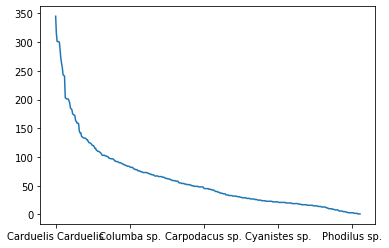

In [18]:
images['species'].value_counts().plot()

# Merge minor genuses by family

In [19]:
def merge_genuses(row):
    if (row['species'] in genus_list):
        return row['family']
    else:
      return row['species']

In [20]:
count = images.groupby('species').count()
minor_genus = count.loc[count['filename'] < MIN_IMAGES]
genus_list = minor_genus.index.to_list()

In [21]:
images['species'] = images.apply(merge_genuses, axis = 1)

In [22]:
images['species'].value_counts()

Carduelis Carduelis      345
Asio Otus                315
Accipiter Nisus          301
Accipiter Gentilis       301
Haematopus Ostralegus    301
                        ... 
Cracidae                   6
Sulidae                    5
Phaenicophilidae           3
Icteridae                  3
Numididae                  1
Name: species, Length: 281, dtype: int64

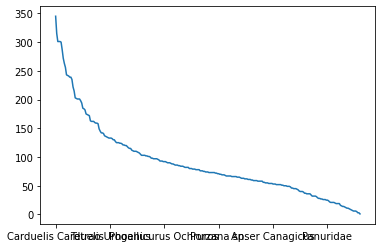

In [23]:
images['species'].value_counts().plot()

# Drop classes which still have not enough images

In [24]:
count = images.groupby('species').count()
minor_genus = count.loc[count['filename'] < MIN_IMAGES]
drop_list = minor_genus.index.to_list()

In [25]:
images = images[~images['species'].isin(drop_list)].reset_index(drop=True)

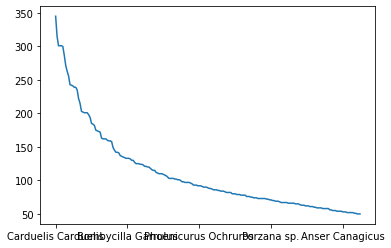

In [28]:
images['species'].value_counts().plot()

In [29]:
images['species'].value_counts()

Carduelis Carduelis      345
Asio Otus                315
Haematopus Ostralegus    301
Accipiter Nisus          301
Accipiter Gentilis       301
                        ... 
Riparia Riparia           51
Mareca Strepera           51
Zoothera Aurea            50
Monticola Solitarius      50
Spinus sp.                50
Name: species, Length: 213, dtype: int64

In [30]:
images.to_csv('feathers_data_normalized.csv')